<a href="https://colab.research.google.com/github/virajdesai0309/DWSim-X-NEQSim/blob/main/DWSim_X_NEQSim_Heater_Cooler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heater Cooler Example

##Basis

This notebook demonstrates how to use the heater/cooler unit operation in NEQSim. It simulates the an equimolar mixture of benzene and toluene. This example is based on a similar simulation in DWSim Process Simulator, where a stream with a temperature of 300 K, a pressure of 101325 Pa, and a flow rate of 1 kg/s is being heated till 400 K and then cooled till 300 K

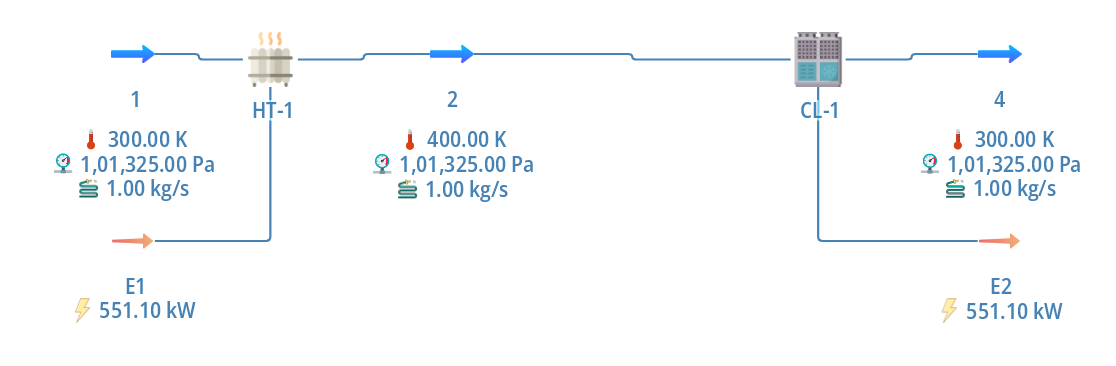

The simulation involves defining the fluid mixture, performing a TPflash for phase equilibrium calculations, setting up the feed stream, configuring the heater & cooler, running the simulation, and retrieving the stream properties.

In [4]:
!pip install neqsim
from neqsim.thermo import fluid, TPflash, printFrame, dataFrame
from neqsim.process import clearProcess, stream, heater, cooler, runProcess

# 1. Define the fluid (benzene and toluene mixture)
fluid_mix = fluid('raoult')
fluid_mix.addComponent('benzene', 0.5)  # Equimolar benzene
fluid_mix.addComponent('toluene', 0.5)  # Equimolar toluene
fluid_mix.setMixingRule(3)

# 2. Set initial conditions for the fluid stream
fluid_mix.setTemperature(300, 'K')  # Initial temperature = 300 K
fluid_mix.setPressure(101325, 'Pa')  # Initial pressure = 101325 Pa
fluid_mix.setTotalFlowRate(3600, 'kg/hr')  # Flow rate = 1 kg/hr

# 3. Perform TPflash for phase equilibrium calculation
TPflash(fluid_mix)

# 4. Set up feed stream
clearProcess()  # Clear any existing processes
feedStream = stream(fluid_mix)

# 5. Heater to heat the stream from 300 K to 400 K
heater_unit = heater(feedStream)  # Heater unit
heater_unit.setOutTemperature(400, 'K')  # Desired outlet temperature = 400 K

# 6. Cooler to cool the heated stream back to 300 K
cooler_unit = cooler(heater_unit.getOutStream())  # Cooler unit after the heater
cooler_unit.setOutTemperature(300, 'K')  # Desired outlet temperature = 300 K

# 7. Run the process simulation
runProcess()

# 8. Retrieve and print heater outlet stream specs
heated_stream = heater_unit.getOutStream()
print("\n--- Heated Stream Specs ---")
print(f"Temperature: {heated_stream.getTemperature()} K")
print(f"Pressure: {heated_stream.getPressure()} Pa")
print(f"Flow rate: {heated_stream.getFlowRate('kg/hr')} kg/hr")
print(f"Composition: {heated_stream.getFluid().getComponentNames()}")
printFrame(heated_stream.getFluid())

# 9. Retrieve and print cooler outlet stream specs
cooled_stream = cooler_unit.getOutStream()
print("\n--- Cooled Stream Specs ---")
print(f"Temperature: {cooled_stream.getTemperature()} K")
print(f"Pressure: {cooled_stream.getPressure()} Pa")
print(f"Flow rate: {cooled_stream.getFlowRate('kg/hr')} kg/hr")
print(f"Composition: {cooled_stream.getFluid().getComponentNames()}")
printFrame(cooled_stream.getFluid())

# 10. Retrieve and print heater outlet stream specs
heated_stream = heater_unit.getOutStream()
heater_duty = heater_unit.getDuty()  # Get heater duty in watts
print(f"Heater Duty: {heater_duty / 1000:.2f} kW")  # Convert W to kW

# 11. Retrieve and print cooler outlet stream specs
cooled_stream = cooler_unit.getOutStream()
cooler_duty = cooler_unit.getDuty()  # Get cooler duty in watts
print(f"Cooler Duty: {cooler_duty / 1000:.2f} kW")  # Convert W to kW


--- Heated Stream Specs ---
Temperature: 400.0 K
Pressure: 1.01325 Pa
Flow rate: 3600.0 kg/hr
Composition: ['benzene', 'toluene']
| 0                    | 1          | 2                  | 3   | 4   | 5   | 6               |
|:---------------------|:-----------|:-------------------|:----|:----|:----|:----------------|
|                      | total      | GAS                |     |     |     |                 |
| benzene              | 5E-1       | 5E-1               |     |     |     | [mole fraction] |
| toluene              | 5E-1       | 5E-1               |     |     |     | [mole fraction] |
|                      |            |                    |     |     |     |                 |
| Density              |            | 2.65818E0          |     |     |     | kg/m3           |
| Phase Fraction       |            | 1E0                |     |     |     | [mole fraction] |
| Molar Mass           | 8.51275E-2 | 8.51275E-2         |     |     |     | kg/mol          |
| Z factor    